# Assignment 4


## Exercise 1:
### Goal: Implement the clustering algorithm called Bisecting k-Means.
Function to implement k_Means algorithm:

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def bkmeans(X, k, number_it):
    samples_number = X.shape[0]
    k_clusters = np.zeros(samples_number, dtype=int)
    counter = 1
    while counter < k:
        cluster_counts = np.bincount(k_clusters)
        dom_cluster = np.argmax(cluster_counts)
        kmeans = KMeans(n_clusters=2, n_init=number_it)
        dominant_indices = np.where(k_clusters == dom_cluster)[0]
        cluster_label = kmeans.fit(X[dominant_indices]).labels_
        new_values = np.where(cluster_label == 0, dom_cluster, counter)
        k_clusters[dominant_indices] = new_values
        counter += 1
    return k_clusters


And the plotting the output of the clusters:


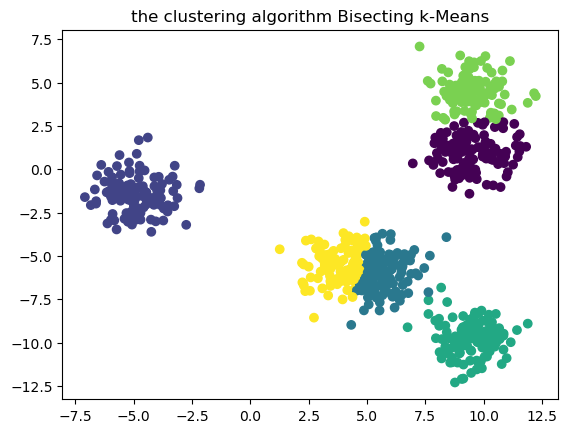

In [5]:
import matplotlib.pyplot as plt
if __name__ == "__main__":
    
    X, y = make_blobs(centers=6,n_samples=700, random_state=4)
    k = 6
    i = 100
    c = bkmeans(X, k, i)

    plt.title("the clustering algorithm Bisecting k-Means")
    plt.scatter(X[:, 0],X[:, 1], c=c)
    plt.show()

## Exercise 2:
### Goal: Implement the non-linear dimensionality reduction algorithm known as Sammon Mapping.
Function to implement sammon algorithm:

In [3]:
import numpy as np
from sklearn.datasets import make_blobs, make_s_curve
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt


def compute_stress_E(X, Y):
    x_matrix = np.triu(X)
    y_matrix = np.triu(Y)
    mask = (x_matrix != 0)
    zero_checker = np.where(mask, x_matrix, 1)
    stress = np.sum(np.square(y_matrix - x_matrix) / zero_checker)
    stress_E = (1 / np.sum(x_matrix)) * stress
    return stress_E


def sammon(X, max_iterations=100, threshold=0.023, learning_rate=1.0, init="random"):
    if init == "random":
        layout = make_blobs(n_samples=X.shape[0], n_features=2, centers=1, random_state=1337)[0]
    else:
        pca = PCA(n_components=2)
        layout = pca.fit_transform(X)
    
    dis_X = pairwise_distances(X)
    dis_X[dis_X == 0] = 1e-100
    c = np.sum(np.triu(pairwise_distances(X)))
    # number of sampled of x
    num = dis_X.shape[0]
    for n in range(max_iterations+1):
        #distance between two y points
        dis_y = pairwise_distances(layout)
        dis_y[dis_y == 0] = 1e-100
        stress = compute_stress_E(dis_X, dis_y)
        print(f"Iteration: {n}, Stress = {stress}")

        if stress < threshold:
            print(f"Stopped with reached stress = {stress} and iteration: {n}")
            break
        
        if (n) == max_iterations:
            print(f" The maximum number of iterations {n} has been reached!.\n")
            break
        
        equ1 = np.divide((dis_X - dis_y), (dis_y * dis_X)).ravel()
        equ2 = np.reciprocal(dis_y * dis_X).ravel()
        equa3 = (dis_X - dis_y).ravel()
        equa4 = dis_y.ravel()
        equa5 = np.add(1, np.divide((dis_X - dis_y), dis_y)).ravel()


        for i in range(layout.shape[0]):
            start, end = i * num, (i * num) + num
            first = (-2 / c) * np.sum(np.c_[equ1[start:end], equ1[start:end]] * (layout[i] - layout), axis=0)
            second = (-2 / c) * np.sum(np.c_[equ2[start:end], equ2[start:end]] * (np.c_[equa3[start:end], equa3[start:end]] - ((np.square(layout[i] - layout) / equa4[start:end, None]) * equa5[start:end, None])), axis=0)
            layout[i] = layout[i] - (learning_rate * (first / np.abs(second)))

    return layout


And the plot:


Run..
Iteration: 0, Stress = 0.6390167608805685
Iteration: 1, Stress = 0.51751480057491
Iteration: 2, Stress = 0.40612169133714066
Iteration: 3, Stress = 0.39848545511248823
Iteration: 4, Stress = 0.8242404584190262
Iteration: 5, Stress = 0.8152471176458654
Iteration: 6, Stress = 0.39338761462064137
Iteration: 7, Stress = 0.6536745172734495
Iteration: 8, Stress = 2.818332673495499
Iteration: 9, Stress = 0.16469109040761112
Iteration: 10, Stress = 0.10520421226619042
Iteration: 11, Stress = 0.05802285825140268
Iteration: 12, Stress = 0.1200319074035849
Iteration: 13, Stress = 0.037066497977608345
Iteration: 14, Stress = 0.030821340691339284
Iteration: 15, Stress = 0.027647152352105207
Iteration: 16, Stress = 0.02720574129859094
Iteration: 17, Stress = 0.03417828288481165
Iteration: 18, Stress = 0.025156995770201897
Iteration: 19, Stress = 0.024016751488042106
Iteration: 20, Stress = 0.023431074317316725
Iteration: 21, Stress = 0.023152649365535245
Iteration: 22, Stress = 0.0229828453237

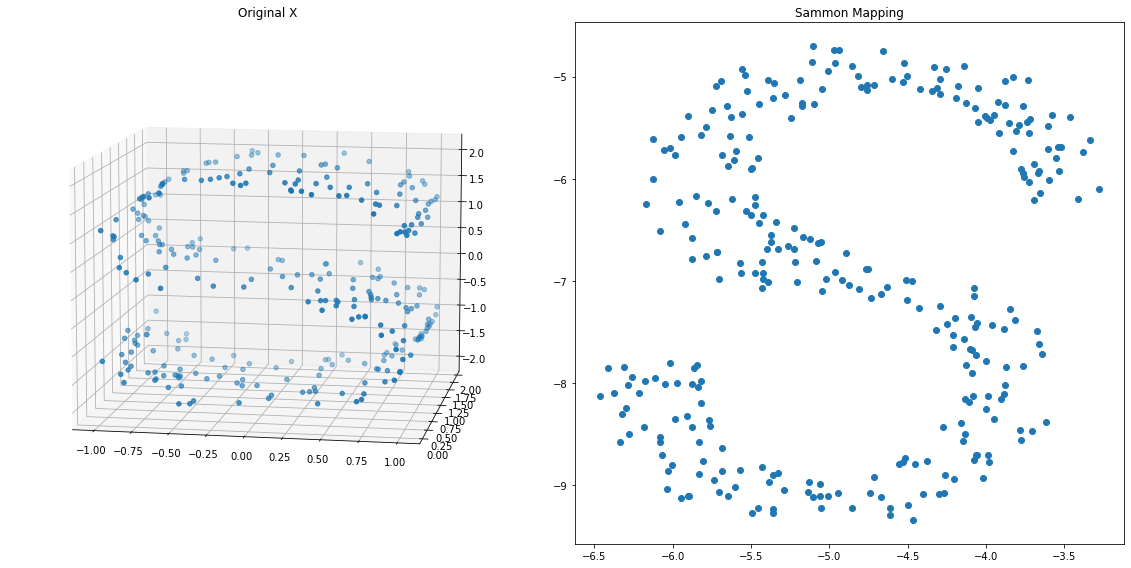

In [4]:

if __name__ == "__main__":
    print ("Run..")

    X, y = make_s_curve(random_state=1, n_samples=300)
    fig = plt.figure(figsize=(16, 8))

    # Original X plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.view_init(elev=10, azim=280)
    ax1.set_title("Original X")
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2])

    # Sammon Mapping plot
    Y = sammon(X)
    ax2 = fig.add_subplot(122)
    ax2.set_title("Sammon Mapping")
    ax2.scatter(Y[:, 0], Y[:, 1])

    plt.tight_layout()
    plt.show()

## Exercise 3:
### Goal: 3.1. Comparison of DR Techniques


In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import warnings
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.io import arff
from Exercise2 import sammon as sammon
warnings.filterwarnings("ignore") 


def fixed_features(features):
    # float
    features = features.astype(np.float64)
    # imput missed values
    imputer = SimpleImputer(strategy='mean')
    return imputer.fit_transform(features)

def fixed_labels(labels):
    # string
    labels = labels.astype(str)
    # get number of different labels
    diff_labels, y = np.unique(labels, return_inverse=True)
    return y, diff_labels

def loading_data(file_path, x_lower, x_upper, y_pos):
    arff_data, _ = arff.loadarff(file_path)
    data = np.array(arff_data.tolist())

    X = fixed_features(data[:, x_lower:x_upper])
    y, labels = fixed_labels(data[:, y_pos])

    return X, y, labels


def plotting(X, y, labels, title, plt_i):
    norm = Normalize(vmin=min(y), vmax=max(y))
    cmap = get_cmap("Set3")  

    ax = plt.subplot(3, 3, plt_i)
    ax.set_title(title)

    for i, label in enumerate(labels):
        mask = y == i
        scatter = plt.scatter(X[mask, 0], X[mask, 1], c=cmap(norm(y[mask])), label=label, marker=".")

    ax.legend()

def visualization(dataset_paths):
    X_list, y_list, labels_list, titles = [], [], [], []

    for file_path, x_lower, x_upper, y_pos in dataset_paths:
        X, y, labels = loading_data(file_path, x_lower, x_upper, y_pos)
        X_list.append(X)
        y_list.append(y)
        labels_list.append(labels)
        titles.append(file_path.split("/")[-1].split(".")[0])

    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, init="pca", learning_rate="auto")
    
    plt.figure(figsize=(16, 8))
    for i, (X, y, labels, title) in enumerate(zip(X_list, y_list, labels_list, titles), start=1):
        Y_tsne = tsne.fit_transform(X)
        Y_pca = pca.fit_transform(X)
        Y_sammon = sammon(X)
        
        plotting(Y_tsne, y, labels, f"{title} T-SNE", i )
        plotting(Y_pca, y, labels, f"{title} PCA", i +3)
        plotting(Y_sammon, y, labels, f"{title} Sammon", i + 6)
    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)
    plt.show()



Visualisation:

Run..
Iteration: 0, Stress = 0.9854484652213192
Iteration: 1, Stress = 0.9730223790758397
Iteration: 2, Stress = 1.3958194449060486
Iteration: 3, Stress = 3.2256970947969346
Iteration: 4, Stress = 1.2116423253965396
Iteration: 5, Stress = 3.0566340410835373
Iteration: 6, Stress = 3.5989648386227717
Iteration: 7, Stress = 0.8755651799755976
Iteration: 8, Stress = 2.778458459854481
Iteration: 9, Stress = 0.827339397023896
Iteration: 10, Stress = 1.1006554243552074
Iteration: 11, Stress = 471.3003612876253
Iteration: 12, Stress = 2.4819929405509837
Iteration: 13, Stress = 38.05186826998429
Iteration: 14, Stress = 1.0813291553876414
Iteration: 15, Stress = 1.395095542253004
Iteration: 16, Stress = 0.6586942465194005
Iteration: 17, Stress = 16.351185117082192
Iteration: 18, Stress = 36.3536634485241
Iteration: 19, Stress = 0.6226870068985876
Iteration: 20, Stress = 0.3490451099929761
Iteration: 21, Stress = 26.960188071106817
Iteration: 22, Stress = 0.435722258394543
Iteration: 23, Stress =

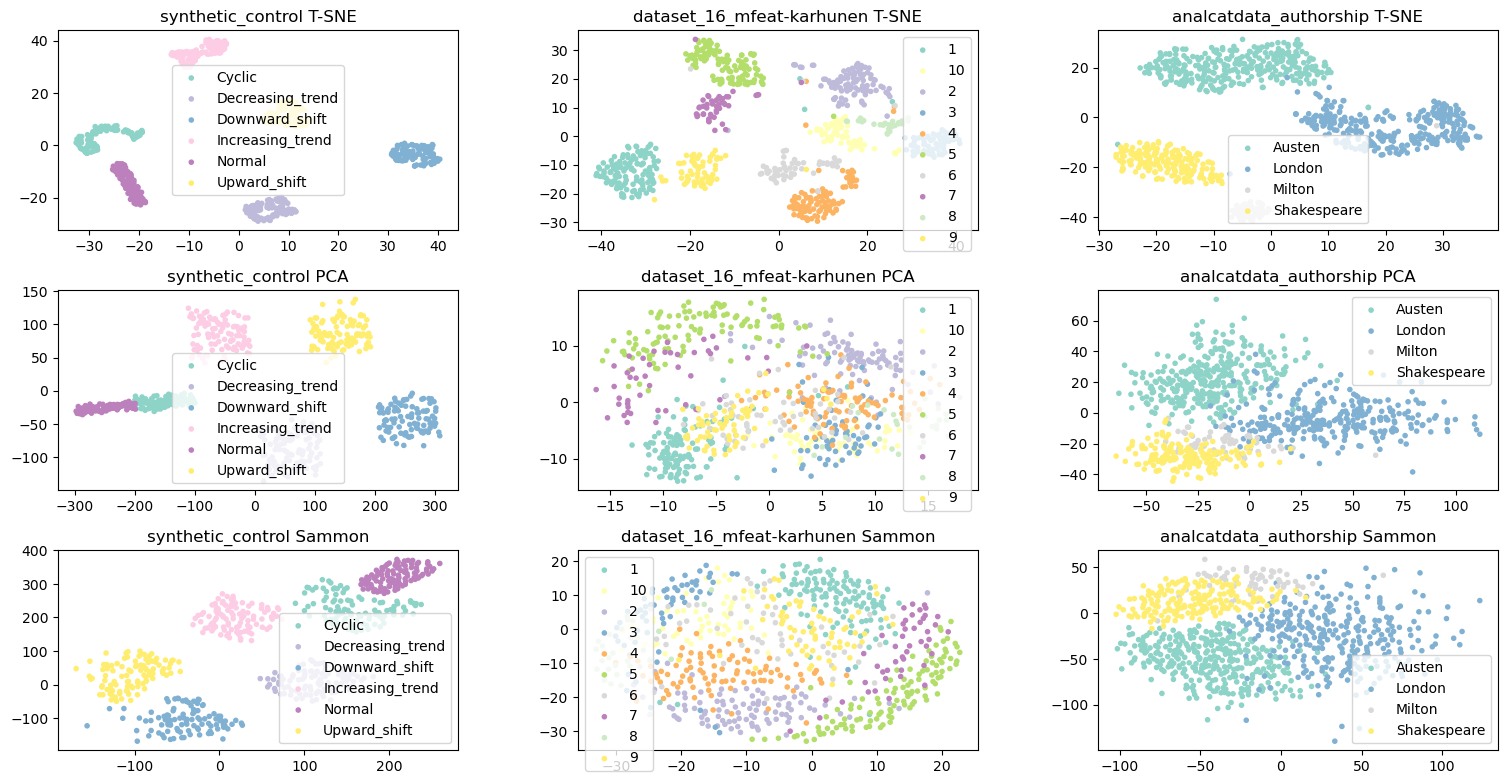

In [2]:
if __name__ == "__main__":
    
    print ("Run..")
    dataset_paths = [
        ("datasets/synthetic_control.arff", 0, -1, -1),
        ("datasets/dataset_16_mfeat-karhunen.arff", 0, -1, -1),
        ("datasets/analcatdata_authorship.arff", 0, -1, -1)
    ]

    visualization(dataset_paths)


## 3.1 results 
For all dataset visualizations, it seems to be T-SNE the best. T-SNE, PCA and Sammon are dimensionality reduction algorithms used to visualize high-dimensional data in a lower-dimensional way. T-SNE due to its ability to most effectively capture data distribution.
1. For dataset Synthetic_control  all algorithms part the data in different groups with a good performance. The algorithms give similar output. PCA performs better when the data can be linearly separated, synthetic dataset could be an example.  But still, The best one is T-SNE, because Cyclic and Normal clusters have is close to each other and may get mixed in some data points. 
2. For dataset_16_mfeat_karhunenth the worst visualization is PCA, the reason behind that may be because of the outlier and it fails when the data set is not linearly compenation which can make a grouping. Sammon mapping has ok separation for 1, 5 but it has high overlapping. However, T-SNE has some mixed points between 2,7 and 9 but it gives the best visualization.
3. For analcatdata both PCA and Sammon have overlapping, but it is not a bad visualization. 
T-SNE and Sammon do not depend on linear separation, so they can be used to capture non-linearly relationships. Sammon mapping focuses more on the groups, making it of low importance to the large distances. Sammon gives good results, but it effects negatively of noise. 


### Goal: 3.2 Comparison of Clustering Techniques


Running...
Iteration: 0, Stress = 0.9854484652213192
Iteration: 1, Stress = 0.9730223790758397
Iteration: 2, Stress = 1.3958194449060486
Iteration: 3, Stress = 3.2256970947969346
Iteration: 4, Stress = 1.2116423253965396
Iteration: 5, Stress = 3.0566340410835373
Iteration: 6, Stress = 3.5989648386227717
Iteration: 7, Stress = 0.8755651799755976
Iteration: 8, Stress = 2.778458459854481
Iteration: 9, Stress = 0.827339397023896
Iteration: 10, Stress = 1.1006554243552074
Iteration: 11, Stress = 471.3003612876253
Iteration: 12, Stress = 2.4819929405509837
Iteration: 13, Stress = 38.05186826998429
Iteration: 14, Stress = 1.0813291553876414
Iteration: 15, Stress = 1.395095542253004
Iteration: 16, Stress = 0.6586942465194005
Iteration: 17, Stress = 16.351185117082192
Iteration: 18, Stress = 36.3536634485241
Iteration: 19, Stress = 0.6226870068985876
Iteration: 20, Stress = 0.3490451099929761
Iteration: 21, Stress = 26.960188071106817
Iteration: 22, Stress = 0.435722258394543
Iteration: 23, Str

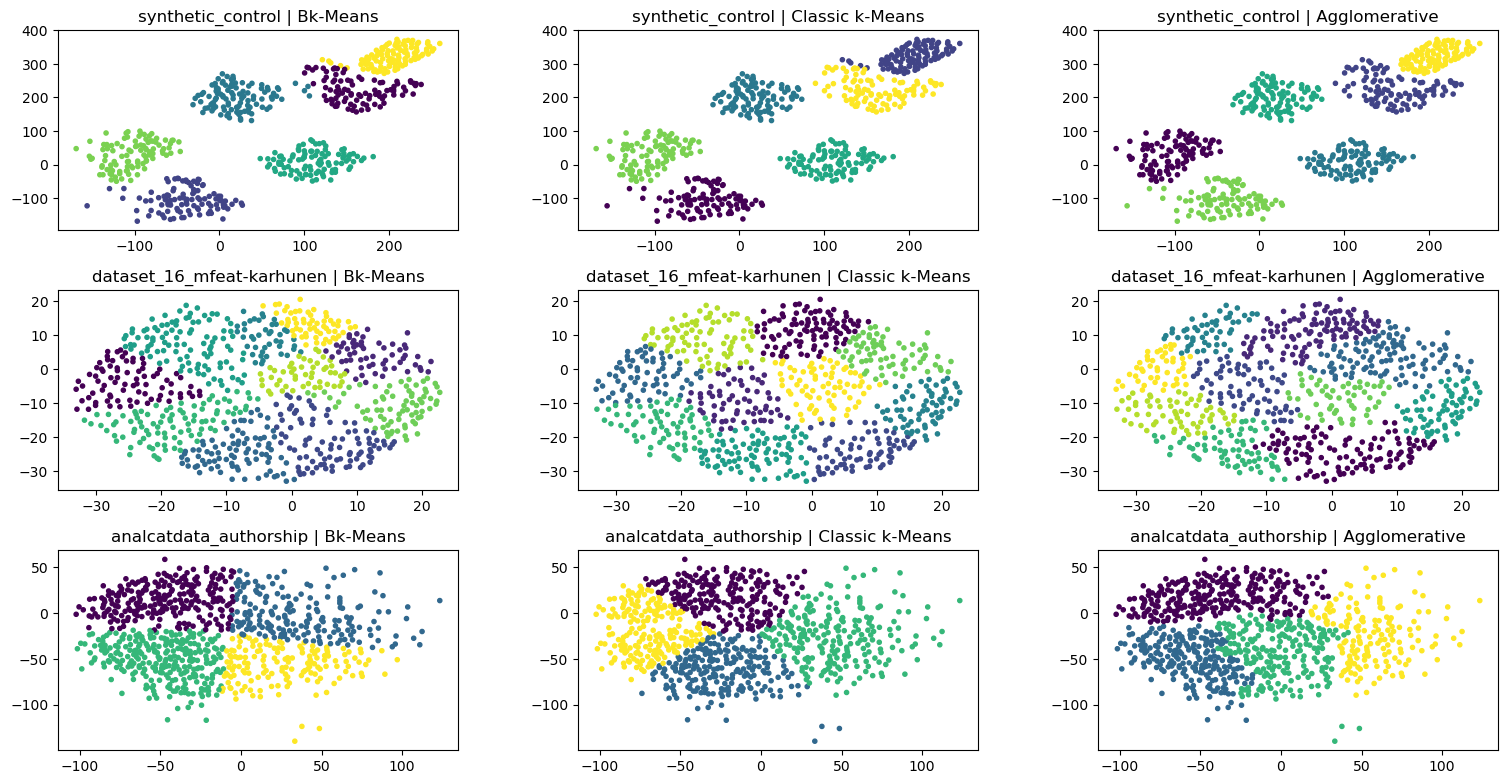

In [7]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.impute import SimpleImputer
from Exercise1 import bkmeans 
from Exercise2 import sammon
from Exercise3_1 import loading_data


def plotting_clust(X, y, labels, titles):
    iters = 100
    for r in range(len(X)):
        bkm = bkmeans(X[r], len(labels[r]), iters)
        k_means = KMeans(n_clusters=len(labels[r]), n_init=iters).fit_predict(X[r])
        agglomerative = AgglomerativeClustering(n_clusters=len(labels[r]), linkage='ward').fit_predict(X[r])
        for c, Y in enumerate([bkm, k_means, agglomerative]):
            norm = Normalize(vmin=0, vmax=max(y[r]))
            plt.subplot(3, 3, [1, 4, 7][r] + c)
            plt.title(f'{titles[r]} | {["Bk-Means", "Classic k-Means", "Agglomerative"][c]}')
            plt.scatter(X[r][:, 0], X[r][:, 1], c=Y, marker=".")

def visualization(dataset_paths):
    X_list, y_list, labels_list, titles = [], [], [], []

    for file_path, x_lower, x_upper, y_pos in dataset_paths:
        X, y, labels = loading_data(file_path, x_lower, x_upper, y_pos)
        X_list.append(X)
        y_list.append(y)
        labels_list.append(labels)
        titles.append(file_path.split("/")[-1].split(".")[0])

    imputer = SimpleImputer(strategy="mean")
    X_list[2] = imputer.fit_transform(X_list[2])
    Y_list = [sammon(X) for X in X_list]

    plt.figure(figsize=(16, 8))
    plotting_clust(Y_list, y_list, labels_list, titles)
    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)
    plt.show()

if __name__ == "__main__":
    print("Running...")
    
    dataset_paths = [

        ("datasets/synthetic_control.arff", 0, -1, -1),
        ("datasets/dataset_16_mfeat-karhunen.arff", 0, -1, -1),
        ("datasets/analcatdata_authorship.arff", 0, -1, -1)
    ]
    
    visualization(dataset_paths)



## 3.2

1. For dataset Synthetic_control  all algorithms give similar good output. This dataset contains well-separated and distinct clusters, making it reasonably simple for various clustering methods to recognize them.
2. For dataset dataset_16_mfeat_karhunen all algorithms give similar but not so efficient output. There is some Overlapping between clusters.  KMeans separate the data by a hyperplane. The clusters don't give a sense, it seems the data is parted to clustered with balansed cluster sizes.  
3. For analcatdata the agglomerative is best. When the data has a hierarchical structure, or when the data points may be clustered at different granularities, aggregative hierarchical clustering frequently performs well. It will work well for datasets that have clusters of various sizes and forms.
